<a href="https://colab.research.google.com/github/ag22042008/data-Science-notebooks/blob/main/ipl2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
ipl2025=pd.read_csv('/content/matches.csv')

Dataset Understanding

How many matches were played in IPL 2025?

How many teams participated?

List all venues used in the season.

Matches played per venue.

Matches played per team.

Runs & Match Overview

Total runs scored in IPL 2025.

Average runs per match.

Highest and lowest team score.

Distribution of runs per innings (histogram).

Number of high-scoring matches (200+ total runs).

Toss & Results

Toss winners: how many chose bat vs field?

Match wins after winning the toss.

Win percentage while chasing vs batting first.

Matches won by runs vs wickets.

Margin of victory distribution.

In [6]:
ipl2025

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,completed,RCB,NaN,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,completed,RCB,NaN,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,completed,MI,20,NaN,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,completed,PBKS,NaN,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43


In [7]:
ipl2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

In [8]:
# handling null values
ipl2025.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,1
toss_decision,0
first_ings_score,1
first_ings_wkts,1


In [9]:
ipl2025.fillna(0,inplace=True)

In [10]:
ipl2025.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


How many matches were played in IPL 2025?

In [11]:
ipl1=ipl2025['match_id'].value_counts().sum()

In [12]:
ipl1

np.int64(74)

How many teams participated?

In [13]:
ipl2025.head(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,0,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,0,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,0,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,0,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,0,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [14]:
ipl3=ipl2025['team1'].unique()

In [15]:
ipl3

array(['KKR', 'SRH', 'CSK', 'DC', 'GT', 'RR', 'MI', 'LSG', 'RCB', 'PBKS'],
      dtype=object)

In [16]:
print(f'total no of teams participated in ipl2025 is {len(ipl3)}and names of the teams are {ipl3}')

total no of teams participated in ipl2025 is 10and names of the teams are ['KKR' 'SRH' 'CSK' 'DC' 'GT' 'RR' 'MI' 'LSG' 'RCB' 'PBKS']


List all venues used in the season.

In [17]:
iplvenues=ipl2025['venue'].unique()

In [18]:
iplvenues

array(['Eden Gardens, Kolkata',
       'Rajiv Gandhi International Stadium, Hyderabad',
       'MA Chidambaram Stadium, Chennai',
       'ACA-VDCA Cricket Stadium, Vishakhapatnam',
       'Narendra Modi Stadium, Ahmedabad', 'Barsapara Stadium, Guwahati',
       'Wankhede Stadium, Mumbai', 'Ekana Cricket Stadium, Lucknow',
       'M. Chinnaswamy Stadium, Bangalore',
       'New PCA Cricket Stadium, Mullanpur',
       'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi',
       'HPCA Stadium, Dharamshala'], dtype=object)

#Matches played per venue.

In [19]:
iplvenue=ipl2025['venue'].value_counts()

In [20]:
iplvenue

,count
venue,
"Narendra Modi Stadium, Ahmedabad",9
"Ekana Cricket Stadium, Lucknow",8
"Eden Gardens, Kolkata",7
"Wankhede Stadium, Mumbai",7
"Arun Jaitley Stadium, Delhi",7
"Sawai Mansingh Stadium, Jaipur",7
"New PCA Cricket Stadium, Mullanpur",6
"Rajiv Gandhi International Stadium, Hyderabad",6
"MA Chidambaram Stadium, Chennai",6


<Axes: ylabel='venue'>

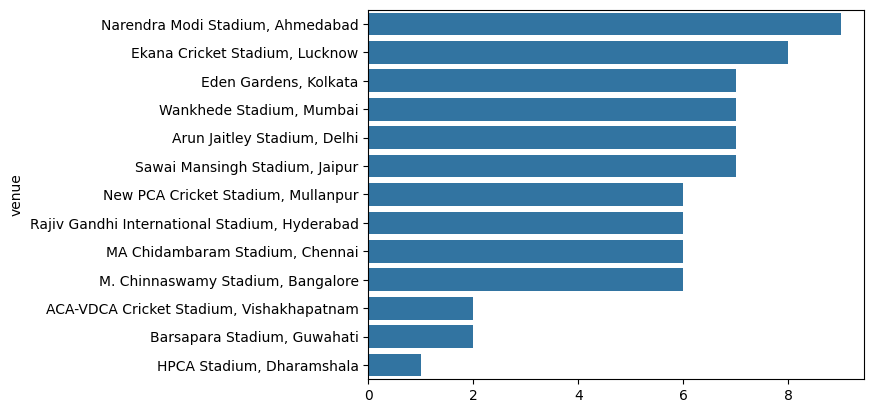

In [21]:
sns.barplot(y=iplvenue.index,x=iplvenue.values)

#Matches played per team.

In [22]:
iplteam=ipl2025['team1'].value_counts()+ipl2025['team2'].value_counts()

In [23]:
iplteam

,count
CSK,14
DC,14
GT,15
KKR,14
LSG,14
MI,16
PBKS,17
RCB,16
RR,14
SRH,14


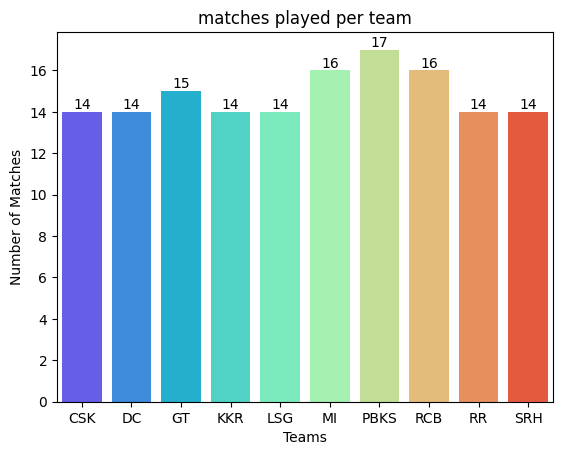

In [24]:
ax = sns.barplot(x=iplteam.index, y=iplteam.values, palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

plt.title('matches played per team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.show()

#Total runs scored in IPL 2025 in each playoff match.

In [25]:
ipl2025['total_score_per_match']=ipl2025['first_ings_score']+ipl2025['second_ings_score']

In [26]:
ipl2025

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,total_score_per_match
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,RCB,0,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,351.0
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,SRH,44,0,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,528.0
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,CSK,0,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,313.0
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,DC,0,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,420.0
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,PBKS,11,0,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,RCB,0,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74,457.0
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,RCB,0,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17,207.0
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,MI,20,0,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42,436.0
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,PBKS,0,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43,410.0


In [27]:
ipl2025runs=ipl2025[['match_id','total_score_per_match','team1','team2']].tail(4)

In [28]:
ipl2025runs

,match_id,total_score_per_match,team1,team2
70,71,207.0,PBKS,RCB
71,72,436.0,GT,MI
72,73,410.0,PBKS,MI
73,74,374.0,RCB,PBKS


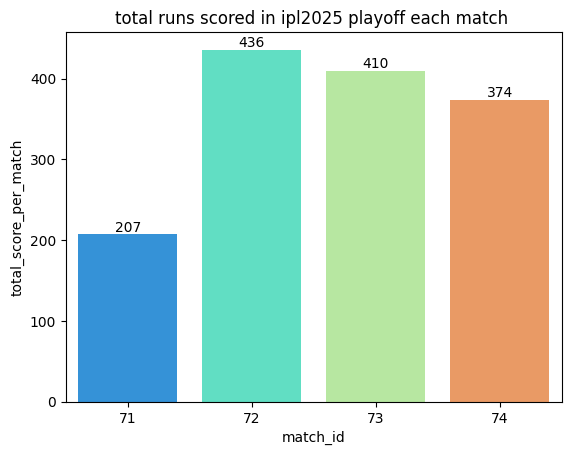

In [29]:
ax=sns.barplot(x=ipl2025runs['match_id'],y=ipl2025runs['total_score_per_match'],palette='rainbow')
plt.title('total runs scored in ipl2025 playoff each match ')
for container in ax.containers:
    ax.bar_label(container)

#points table per team from each match

In [30]:
ipl2025['match_winner']

,match_winner
0,RCB
1,SRH
2,CSK
3,DC
4,PBKS
...,...
69,RCB
70,RCB
71,MI
72,PBKS


In [31]:
ipl5 = ipl2025.drop(ipl2025.tail(5).index)

In [32]:
ipl5 = ipl2025.drop(ipl2025.tail(4).index)
ipl20=ipl5['match_winner']

ipl15=ipl5[ipl5['match_winner']!=0]['match_winner'].value_counts()*2
ipl15

,count
match_winner,
PBKS,20
GT,18
DC,16
RCB,16
MI,14
SRH,12
LSG,12
KKR,10
CSK,8


In [33]:
# Identify matches where match_winner is 0 (interpreting as matches where points might be split)
tied_or_no_result_matches = ipl5[ipl5['match_winner'] == 0]

# Add 1 point to each participating team in these matches
for index, row in tied_or_no_result_matches.iterrows():
    team1 = row['team1']
    team2 = row['team2']

    # Ensure teams exist in ipl15 before adding points
    if team1 in ipl15.index:
        ipl15[team1] += 1
    else:
        ipl15[team1] = 1 # Initialize if team was not a winner in any other match

    if team2 in ipl15.index:
        ipl15[team2] += 1
    else:
        ipl15[team2] = 1 # Initialize if team was not a winner in any other match

# Sort the updated points table for better readability
ipl15 = ipl15.sort_values(ascending=False)

display(ipl15)

,count
match_winner,
PBKS,21
GT,18
DC,17
RCB,17
MI,14
SRH,13
LSG,12
KKR,12
CSK,8


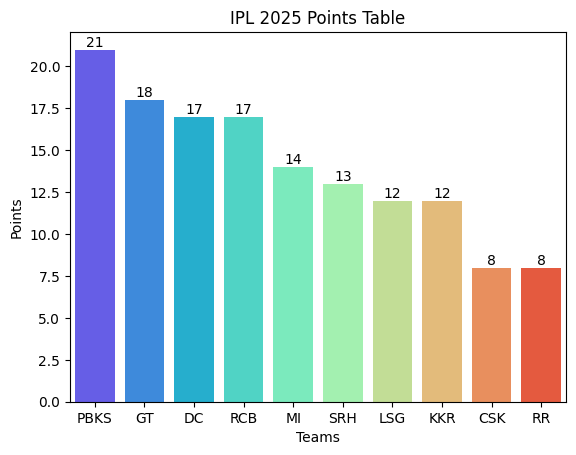

In [34]:
ax = sns.barplot(x=ipl15.index, y=ipl15.values, palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)
plt.title('IPL 2025 Points Table')
plt.xlabel('Teams')
plt.ylabel('Points')
plt.show()

In [35]:
display(ipl15)

,count
match_winner,
PBKS,21
GT,18
DC,17
RCB,17
MI,14
SRH,13
LSG,12
KKR,12
CSK,8


In [36]:
ipl6 = ipl2025[ipl2025['top_scorer'] != 0][['top_scorer', 'highscore']]

In [37]:
ipl7=ipl6.groupby('top_scorer').max().sort_values(by='highscore',ascending=False)

In [38]:
# “Top 10 highest individual scores in IPL 2025”
ipl8=ipl7.head(15)

In [39]:
type(ipl8)

pandas.core.frame.DataFrame

In [40]:
ipl8

,highscore
top_scorer,
Abhishek Sharma,141.0
Rishabh Pant,118.0
Mitchell Marsh,117.0
Sai Sudarshan,108.0
Ishan Kishan,106.0
Heinrich Klassen,105.0
Priyansh Arya,103.0
Vaibhav Suryavanshi,101.0
Jos Buttler,97.0


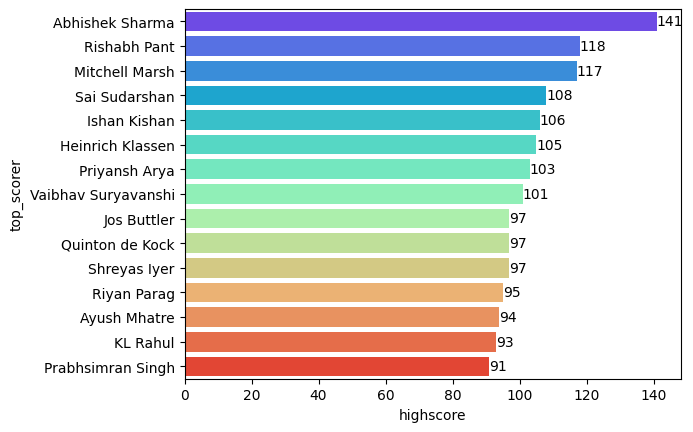

In [41]:
ax=sns.barplot(y=ipl8.index,x=ipl8['highscore'],palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

In [42]:
ipl2025['first_ings_batting'] = np.where(
    ipl2025['toss_decision'] == 'Bat', # Condition: If toss winner chose to Bat
    ipl2025['toss_winner'], # If True, the toss winner batted first
    np.where( # If False (toss winner chose to Bowl)
        ipl2025['toss_winner'] == ipl2025['team1'], # If team1 won toss and bowled
        ipl2025['team2'], # Then team2 batted first
        ipl2025['team1']  # Else (team2 won toss and bowled), team1 batted first
    )
)

In [43]:
ipl2025points=ipl2025[(ipl2025['team1']=='PBKS')|(ipl2025['team2']=='PBKS')]

In [44]:
ipl2025points

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,total_score_per_match,first_ings_batting
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,11,0,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,475.0,PBKS
12,13,"April 01,2025","Ekana Cricket Stadium, Lucknow",LSG,PBKS,League,PBKS,Bowl,171.0,7.0,...,0,8,22.0,Prabhsimran Singh,Prabhsimran Singh,69.0,Arshdeep Singh,3--43,348.0,LSG
17,18,"April 05,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RR,League,PBKS,Bowl,205.0,4.0,...,50,0,0.0,Jofra Archer,Yashasvi Jaiswal,67.0,Jofra Archer,3--25,360.0,RR
21,22,"April 08,2025","New PCA Cricket Stadium, Mullanpur",PBKS,CSK,League,PBKS,Bat,219.0,6.0,...,18,0,0.0,Priyansh Arya,Priyansh Arya,103.0,Lockie Ferguson,2--40,420.0,PBKS
26,27,"April 12,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,PBKS,League,PBKS,Bat,245.0,6.0,...,0,8,9.0,Abhishek Sharma,Abhishek Sharma,141.0,Harshal Patel,4--42,492.0,PBKS
30,31,"April 15,2025","New PCA Cricket Stadium, Mullanpur",PBKS,KKR,League,PBKS,Bat,111.0,10.0,...,16,0,29.0,Yuzvendra Chahal,Angkrish Raghuvanshi,37.0,Yuzvendra Chahal,4--28,206.0,PBKS
33,34,"April 18,2025","M. Chinnaswamy Stadium, Bangalore",RCB,PBKS,League,PBKS,Bowl,95.0,9.0,...,0,5,11.0,Tim David,Tim David,50.0,Josh Hazlewood,3--14,193.0,RCB
36,37,"April 20,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,League,RCB,Bowl,157.0,6.0,...,0,7,7.0,Virat Kohli,Virat Kohli,73.0,Krunal Pandya,2--25,316.0,PBKS
43,44,"April 26,2025","Eden Gardens, Kolkata",KKR,PBKS,League,PBKS,Bat,201.0,4.0,...,0,0,114.0,0,0,0.0,0,0,208.0,PBKS
48,49,"April 30,2025","MA Chidambaram Stadium, Chennai",CSK,PBKS,League,PBKS,Bowl,190.0,10.0,...,0,4,2.0,Shreyas Iyer,Sam Curran,88.0,Yuzvendra Chahal,4--32,384.0,CSK


#Bowling Analysis

Top 10 wicket takers.

Economy rate distribution of bowlers.

Wickets vs economy rate (scatter).

Bowlers with best economy (min overs filter).

Bowler performance in winning vs losing matches.

In [45]:
bowlers=pd.read_csv('/content/IPL2025Bowlers.csv')

In [46]:
bowlers

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
2,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
3,Trent Boult,MI,22,16,16,57.4,517,26/4,23.50,8.96,15.72,1,0
4,Arshdeep Singh,PBKS,21,17,16,58.2,518,16/3,24.66,8.88,16.66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Marcus Stoinis,PBKS,1,13,9,14.1,175,14/1,175.00,12.35,85.00,0,0
104,Shahrukh Khan,GT,1,15,1,1.0,13,13/1,13.00,13.00,6.00,0,0
105,V Satyanarayana Penmetsa,MI,1,2,2,4.0,53,40/1,53.00,13.25,24.00,0,0
106,Musheer Khan,PBKS,1,1,1,2.0,27,27/1,27.00,13.50,12.00,0,0


In [47]:
iplbowlersbesteconomy=bowlers[['Player Name','ECO','Team']].sort_values(by='ECO').head(10)

In [48]:
iplbowlersbesteconomy

,Player Name,ECO,Team
88,Nuwan Thushara,6.50,RCB
6,Jasprit Bumrah,6.67,MI
89,Anukul Roy,6.75,KKR
16,Kuldeep Yadav,7.07,DC
29,Jaydev Unadkat,7.34,SRH
7,Varun Chakaravarthy,7.66,KKR
27,Sunil Narine,7.80,KKR
74,Ayush Badoni,7.80,LSG
90,Corbin Bosch,7.85,MI
61,Mustafizur Rahman,7.90,DC


In [49]:
import plotly.express as px

fig = px.bar(
    iplbowlersbesteconomy,
    y='Player Name',
    x='ECO',
    title='Top Bowlers by Economy Rate (IPL 2025)',
    labels={'ECO': 'Economy Rate', 'Player Name': 'Bowler'},
    color='ECO', # Color bars based on economy rate
    color_continuous_scale=px.colors.sequential.Rainbow # Use a suitable color scale
)

fig.update_layout(xaxis_title='Economy Rate', yaxis_title='Player Name', xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()

In [50]:
bowlers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  108 non-null    object 
 1   Team         108 non-null    object 
 2   WKT          108 non-null    int64  
 3   MAT          108 non-null    int64  
 4   INN          108 non-null    int64  
 5   OVR          108 non-null    float64
 6   RUNS         108 non-null    int64  
 7   BBI          108 non-null    object 
 8   AVG          108 non-null    float64
 9   ECO          108 non-null    float64
 10  SR           108 non-null    float64
 11  4W           108 non-null    int64  
 12  5W           108 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 11.1+ KB


#Who are the most economical bowlers in IPL 2025 (min overs filter)?

In [51]:
# lets us analyze the overs first of each bowlers
Bowlers6=bowlers[['Player Name','OVR','ECO']]

In [52]:
# lets us analyze the overs first of each bowlers
Bowlers6 = bowlers[['Player Name','OVR','ECO','WKT']]

# Filter to keep only bowlers with 10 or more overs for a 'minimum overs filter'
Bowlers6 = Bowlers6[Bowlers6['OVR'] >= 10]
Bowlers6=Bowlers6.sort_values(by='ECO',ascending=True).head(10)

In [53]:
display(Bowlers6)

,Player Name,OVR,ECO,WKT
6,Jasprit Bumrah,47.2,6.67,18
16,Kuldeep Yadav,51.0,7.07,15
29,Jaydev Unadkat,23.5,7.34,11
7,Varun Chakaravarthy,50.0,7.66,17
27,Sunil Narine,45.0,7.80,12
61,Mustafizur Rahman,11.0,7.90,4
36,Mitchell Santner,39.3,7.92,10
43,Anshul Kamboj,21.3,8.00,8
1,Noor Ahmad,50.0,8.16,24
8,Krunal Pandya,46.0,8.23,17


fig = px.bar(
    iplbowlersbesteconomy,
    y='Player Name',
    x='ECO',
    title='Top Bowlers by Economy Rate (IPL 2025)',
    labels={'ECO': 'Economy Rate', 'Player Name': 'Bowler'},
    color='ECO', # Color bars based on economy rate
    color_continuous_scale=px.colors.sequential.Rainbow # Use a suitable color scale
)

fig.update_layout(xaxis_title='Economy Rate', yaxis_title='Player Name', xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()

In [54]:
fig=px.bar(
    Bowlers6,
    y='Player Name',
    x='ECO',
    title='Top consistent Bowlers(IPL 2025)',
    labels={'ECO': 'Economy Rate', 'Player Name': 'Bowler'},
    color='ECO',
    color_continuous_scale=px.colors.sequential.Viridis,)
fig.update_layout(xaxis_title='Economy Rate', yaxis_title='Player Name', xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()

#“Is there a trade-off between economy rate and wicket-taking ability in IPL 2025?”

In [68]:
bowlers2=bowlers[['Player Name','OVR','ECO','WKT', 'Team','SR']]

<Axes: xlabel='WKT', ylabel='ECO'>

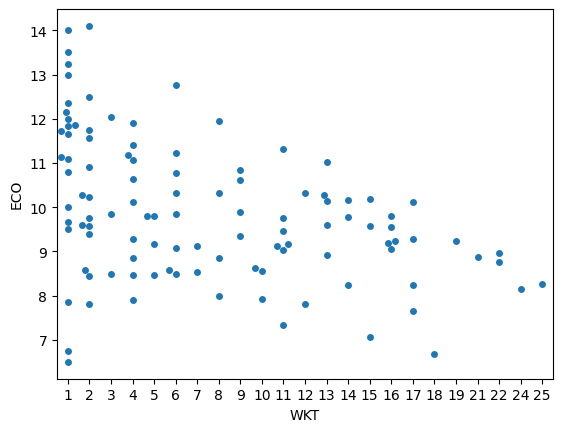

In [69]:
sns.swarmplot(data=bowlers2,y='ECO',x='WKT')


In [70]:
import plotly.express as px

fig = px.scatter(bowlers2, x='WKT', y='ECO', size='OVR', hover_name='Player Name',
                 title='Wickets vs. Economy Rate for Bowlers (IPL 2025)',
                 labels={'WKT': 'Wickets Taken', 'ECO': 'Economy Rate'},
                 color_discrete_sequence=['red'])

fig.update_layout(xaxis_title='Wickets Taken (WKT)', yaxis_title='Economy Rate (ECO)',
                  xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()

#Which bowlers provide the best balance of economy and strike rate?

In [78]:
bowlers24=bowlers[['Player Name','ECO','SR','OVR','Team']]
bowlers24=bowlers24.drop(bowlers24[bowlers24['OVR']<=15].index)


In [84]:
bowlers24.tail(5)

,Player Name,ECO,SR,OVR,Team
68,Ishant Sharma,11.18,27.50,18.2,GT
71,Riyan Parag,8.50,40.00,20.0,RR
72,Prince Yadav,9.85,45.66,22.5,LSG
73,Akash Deep,12.05,38.00,19.0,LSG
82,Mohit Sharma,10.28,75.00,25.0,DC


In [85]:
px.scatter(bowlers24,x='ECO',y='SR',hover_name='Player Name', title='Strike rate vs. Economy Rate for Bowlers (IPL 2025)',
                 labels={'SR': 'Strike Rate', 'ECO': 'Economy Rate'}, color='Team')

#Do bowlers with more overs bowled maintain efficiency?